# Makine Öğrenmesi Modeli Nasıl Oluşturulur ?


# Model Oluşturma İşlem Adımları
1.   Veri Setini Tanıma
2.   Veri Setini Parçalama
3.   Veri Ön İnceleme(Görselleştirme)
4.   Model Oluşturma
5.   Modeli Değerlendirme



### 1. Veri Setini Tanıma

In [152]:
from sklearn.datasets import load_iris # iris veri seti sklearn kütüphanesi içerisinde bulunmaktadır.
iris = load_iris()
print(iris.keys()) # veri setine ait anahtar başlıkları görüntüleyelim.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [153]:
print(iris['DESCR']) # veri setinin özet bilgilerini görüntüleyelim.
# bu veri setinde 150 adet örnek(sample) ve 4 adet nitelik(feature) bulunmaktadır.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [154]:
print(iris['target_names']) # target_names veri setine ait bağımlı değişken(y) değerlerini vermektedir.
# veri seti çiçiek türü ile ilgili olduğundan y değerlerimiz çiçek türleridir.

['setosa' 'versicolor' 'virginica']


In [155]:
print(iris['feature_names']) # feature_names niteliklerin isimlerini vermektedir.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [156]:
print(type(iris['data'])) # verinin tipini öğreniyoruz.

<class 'numpy.ndarray'>


In [157]:
print(iris['data'].shape) # veri setine ait boyut bilgisini vermektedir. 
# bu bilgiden yola çıkarak veri setinde 150 farklı çiçeğin ve bu çiçeklerin 4 farklı özelliğinin olduğu görülmektedir.
# (150,4): 150 = örneklem sayısı(satır sayısı), 4 = nitelik sayısı(sütun sayısı)

(150, 4)


In [158]:
print(iris['data'][:5]) # veri setinin ilk 5 elemanına ait özntitelik değerilerini görüntülüyoruz.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [159]:
print(iris['target']) # veri setinde bulunan örneklemlere ait tür(y) değerlerine ulaşıyoruz.
# 0 = setosa
# 1 = versicolor
# 2 = virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2. Veriyi Setini Parçalama


In [160]:
# Veri setimizi test ve eğitim için ayırma işlemi gerçekleştiriyoruz.
# f(X) = y, X = veri(data) y = etiket(target)
from sklearn.model_selection import train_test_split # eğitim ve test verilerini ayırmak için kullanılan fonksiyonumuzu alıyoruz.

X_egitim, X_test, y_egitim, y_test = train_test_split(iris['data'], iris['target'], random_state = 0, test_size = 0.2)
# train_test_split metodu ayırma yapmadan önce veri setini karıştırmaktadır.
# veriyi karıştırmak önemlidir çünkü veri setinde veriler aynı etiket değerlerine göre sıralanmaktadır.

In [161]:
print(X_test.shape) # test_size kullanarak test verisi oranını %20 olarak belirlediğimizden 30 adet test verisi bulunmaktadır. 
# test_size değeri varsıylan olarak 0.25 gelmektedir.
# 30 = örneklem sayısı, 4 = nitelik sayısı

print(y_test.shape) # y(bağımlı değişken) sayısı ve boyutu

(30, 4)
(30,)


### 3. Veri Ön İnceleme(Görselleştirme)

In [162]:
import pandas as pd # veri görselleştirme için pandas içerisinde bulunan dataframe yapını kullanıyoruz.

iris_df = pd.DataFrame(X_egitim, columns = iris.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd10a54610>,
      dtype=object)

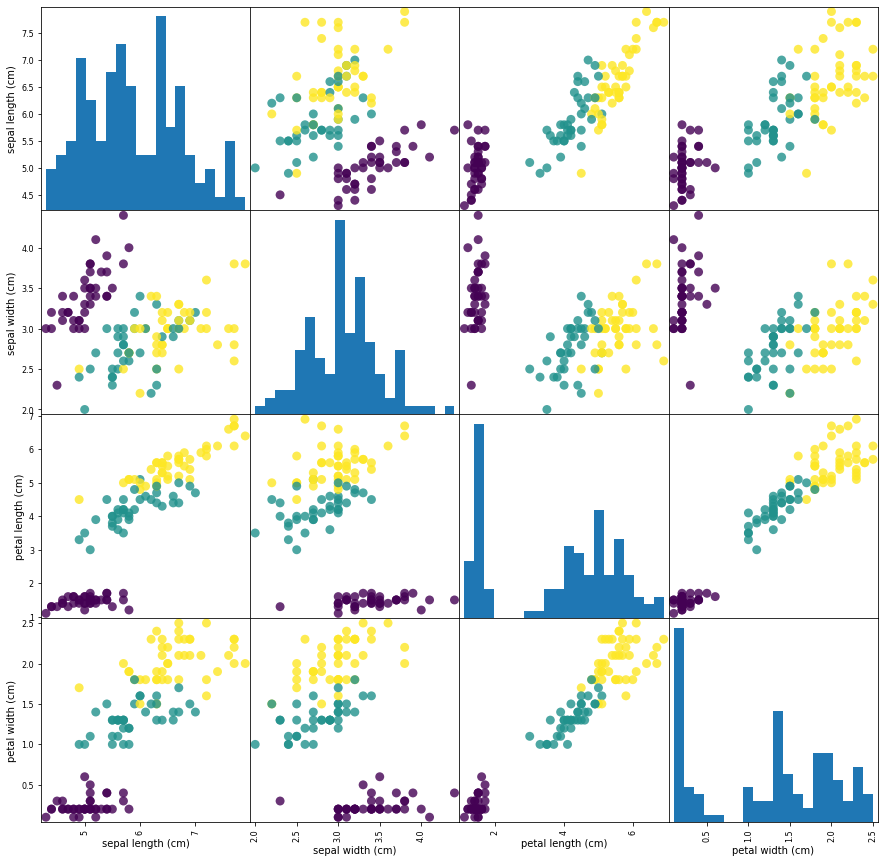

In [163]:
from pandas.plotting import scatter_matrix # pandas içerisinde bulunan ikili grafikleri gösteren yapı
# bu matrisin köşelerinde her bir niteliğin histogramları yer almaktadır.

scatter_matrix(iris_df, c=y_egitim, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=80, alpha=0.8)
# c = grafiğin türlere göre renklemesini istedğimizi belirtiyoruz.
# figsize = grafiğin boyutunu ayarlıyoruz.
# marker = 'o' değerlerin nokta şeklinde gösterilmesini sağlıyoruz.
# hist_kwds = histogramların dikdörtgen genişliklerini ayarlıyoruz.
# s = noktaların büyüklüğünü ayarlıyoruz.
# alpha = noktaların görünümünü ayarlıyoruz.
# aşağıdaki grafikte sepal ve petal ölçülerine göre 3 sınıfın güzel bir şekilde ayrıldığını görüyoruz.

### 4. Model Oluşturma

In [164]:
from sklearn.neighbors import KNeighborsClassifier # K-en yakın komşu algoritmasını model oluşturmak için kullanıyoruz.
knn = KNeighborsClassifier(n_neighbors = 1) # neigbors değişkeni algoritmanın bakaacağı kendisine en yakın olan değer sayısıdır.
knn.fit(X_egitim,y_egitim) # eğitim veri setini kullanarak modelimizi fit ediyoruz yani modelimizi inşa ediyoruz. 

KNeighborsClassifier(n_neighbors=1)

In [165]:
import numpy as np
X_yeni = np.array([[5, 2.9, 1, 0.2]]) # modelimizi denemek için dizi yapısı oluşturuyoruz.
X_yeni.shape

(1, 4)

In [166]:
tahmin = knn.predict(X_yeni)
print(f"Tahmin sınıfı: {tahmin}")
print(f"Tahmin türü: {iris['target_names'][tahmin]}") # tahmin sonuçlarını görüntülüyoruz.

Tahmin sınıfı: [0]
Tahmin türü: ['setosa']


### 5. Modeli Değerlendirme

In [167]:
y_tahmin = knn.predict(X_test) # test verimizi modelimize veriyoruz.
print(y_tahmin)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [168]:
print(np.mean(y_tahmin == y_test)) # tahmin değerleri ile gerçek değerleri karşılaştırarak modelimizin doğruluk değerine ulaşıyoruz.

1.0


In [169]:
print(knn.score(X_test, y_test)) # np.mean metodu ile aynı işlevi görmektedir.

1.0
